# Behavior analysis - using TripMD to assess driving behavior

## 1. Imports and data loading

In [1]:
import os
import sys
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

from tripMD.cluster import plot_dtwsom_bmus
from utils import uah_eval, uah_viz, uah_data

In [2]:
lat_index=0
lon_index=1
freq_per_second = 5

output_folder = os.path.join(ROOT_DIR, "outputs", "all_drivers")
trip_list = pickle.load(open(os.path.join(output_folder, "trip_list.p"), "rb"))
dtwsom_model = pickle.load(open(os.path.join(output_folder, "dtwsom_model.p"), "rb"))
cluster_dict_list = pickle.load(open(os.path.join(output_folder, "dtwsom_clusters.p"), "rb"))

In [3]:
abs_data_path = os.path.abspath("../../data-uah")
uah_df = uah_data.get_full_point_uah_data(abs_data_path, freq_per_second)
clean_uah_df = uah_df[~uah_df["trip_id"].isin(["20151126134736", "20151211160213"])]
trips_df = (clean_uah_df[["user_id", "trip_id", "trip_label", "road"]]
            .drop_duplicates().sort_values("trip_id").reset_index(drop=True))

## 2. Label prediction

In [4]:
labeled_trips_ids = sorted(trips_df[trips_df["user_id"] != "D2"]["trip_id"])
driver_trips_ids = sorted(trips_df[trips_df["user_id"] == "D2"]["trip_id"])
driver_df = uah_eval.compute_test_driver_labels(cluster_dict_list, trip_list, labeled_trips_ids, driver_trips_ids)
driver_df

,aggressive,drowsy,normal,trip_id,trip_true_label,trip_pred_label,is_pred_correct
0,94.149719,78.304179,95.546103,7,normal,normal,True
1,103.137076,72.555152,96.307772,8,aggressive,aggressive,True
2,97.541197,137.901037,120.557766,9,drowsy,drowsy,True
3,35.518577,41.146742,43.334681,10,normal,normal,True
4,46.976615,35.876076,48.147308,11,normal,normal,True
5,91.018444,52.161969,77.819588,12,aggressive,aggressive,True
6,69.651713,81.912239,82.436048,13,drowsy,normal,False


## 3. Label exploration

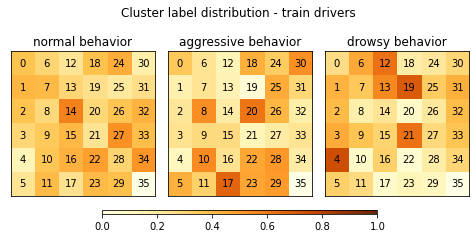

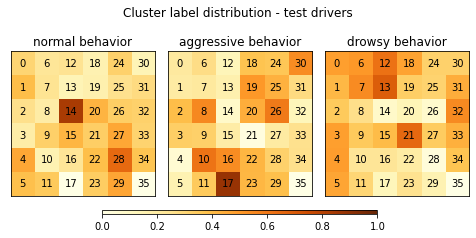

In [5]:
uah_viz.plot_cluster_behavior_rates(cluster_dict_list, trip_list, labeled_trips_ids, dtwsom_model._cols)
plt.suptitle("Cluster label distribution - train drivers")
plt.show()

uah_viz.plot_cluster_behavior_rates(cluster_dict_list, trip_list, driver_trips_ids, dtwsom_model._cols)
plt.suptitle("Cluster label distribution - test drivers")
plt.show()